In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [28]:
df=pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
X=df.iloc[:,[2,3]].values
Y=df.iloc[:,-1].values

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [42]:
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.fit_transform(X_test)

In [43]:
clas=LogisticRegression(random_state=0)
clas.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [44]:
Y_pred=clas.predict(X_test)

In [45]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[130   0]
 [ 61   1]]


<AxesSubplot:>

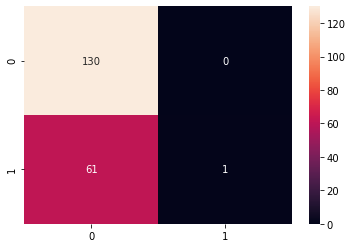

In [46]:
sbs.heatmap(cm,annot=True,fmt='d')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


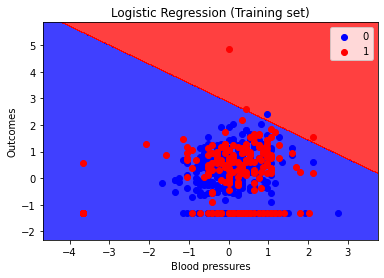

In [58]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, clas.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('blue','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('blue', 'red'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Blood pressures')  
plt.ylabel('Outcomes')  
plt.legend()  
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


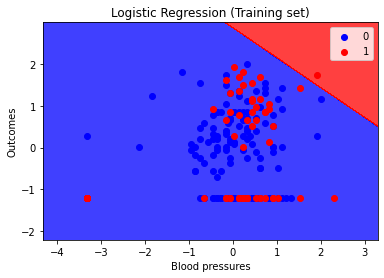

In [57]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_test, Y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, clas.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('blue','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('blue', 'red'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Blood pressures')  
plt.ylabel('Outcomes')  
plt.legend()  
plt.show() 

In [59]:
train_Score=clas.score(X_train,Y_train)
test_score=clas.score(X_test,Y_test)
print("train score",train_Score)
print("test score",test_score)

train score 0.6458333333333334
test score 0.6822916666666666


## KNN ALgo

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [62]:
kprd=knn.predict(X_test)

In [63]:
c=confusion_matrix(Y_test,kprd)
print(c)

[[104  26]
 [ 43  19]]


<AxesSubplot:>

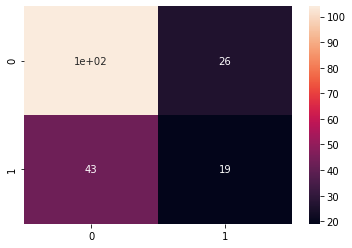

In [64]:
sbs.heatmap(c,annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


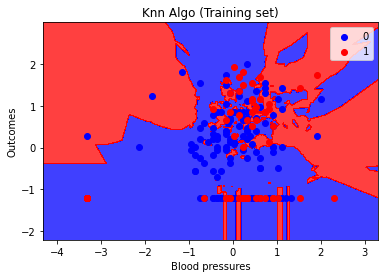

In [66]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_test, Y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('blue','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('blue', 'red'))(i), label = j)  
plt.title('Knn Algo (Training set)')  
plt.xlabel('Blood pressures')  
plt.ylabel('Outcomes')  
plt.legend()  
plt.show() 

In [67]:
train_Score=clas.score(X_train,Y_train)
test_score=clas.score(X_test,Y_test)
print("train score",train_Score)
print("test score",test_score)

train score 0.6458333333333334
test score 0.6822916666666666


## hierarchy cluster

In [70]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
yhc=hc.fit_predict(X)

{'icoord': [[315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [275.0, 275.0, 294.375, 294.375],
  [265.0, 265.0, 284.6875, 284.6875],
  [255.0, 255.0, 274.84375, 274.84375],
  [245.0, 245.0, 264.921875, 264.921875],
  [235.0, 235.0, 254.9609375, 254.9609375],
  [225.0, 225.0, 244.98046875, 244.98046875],
  [215.0, 215.0, 234.990234375, 234.990234375],
  [205.0, 205.0, 224.9951171875, 224.9951171875],
  [195.0, 195.0, 214.99755859375, 214.99755859375],
  [185.0, 185.0, 204.998779296875, 204.998779296875],
  [175.0, 175.0, 194.9993896484375, 194.9993896484375],
  [165.0, 165.0, 184.99969482421875, 184.99969482421875],
  [155.0, 155.0, 174.99984741210938, 174.99984741210938],
  [145.0, 145.0, 164.9999237060547, 164.9999237060547],
  [135.0, 135.0, 154.99996185302734, 154.99996185302734],
  [125.0, 125.0, 144.99998092651367, 144.99998092651367],
  [115.0, 115.0, 134.99999046325684, 134.99999046325684],
  [105.0

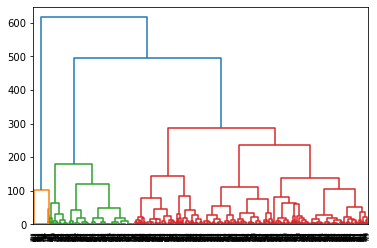

In [72]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()

In [73]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
yhc=hc.fit_predict(X)

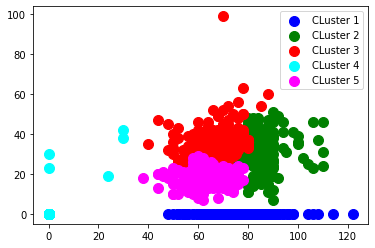

In [76]:
plt.scatter(X[yhc==0,0],X[yhc==0,1],s=100,c='blue',label="CLuster 1")
plt.scatter(X[yhc==1,0],X[yhc==1,1],s=100,c='green',label="CLuster 2")
plt.scatter(X[yhc==2,0],X[yhc==2,1],s=100,c='red',label="CLuster 3")
plt.scatter(X[yhc==3,0],X[yhc==3,1],s=100,c='cyan',label="CLuster 4")
plt.scatter(X[yhc==4,0],X[yhc==4,1],s=100,c='magenta',label="CLuster 5")
plt.legend()
plt.show()

## K Means

C:\ProgramData\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


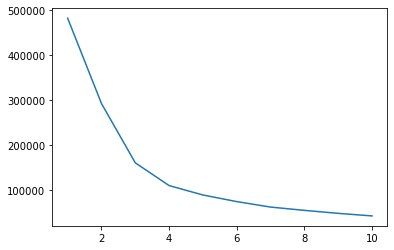

In [79]:
from sklearn.cluster import KMeans
wc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wc.append(kmeans.inertia_)

plt.plot(range(1,11),wc)
plt.show()

In [80]:
print(wc)

[482535.4361979176, 292645.42486338766, 160758.66257816248, 110122.7525848724, 89203.26579233221, 74472.76899628906, 62298.184574695195, 54980.46164485207, 48323.36875495418, 42625.56136940044]


In [82]:
ykm=kmeans.fit_predict(X)

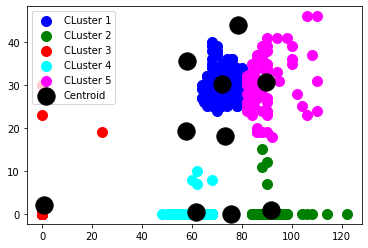

In [86]:
plt.scatter(X[ykm==0,0],X[ykm==0,1],s=100,c='blue',label="CLuster 1")
plt.scatter(X[ykm==1,0],X[ykm==1,1],s=100,c='green',label="CLuster 2")
plt.scatter(X[ykm==2,0],X[ykm==2,1],s=100,c='red',label="CLuster 3")
plt.scatter(X[ykm==3,0],X[ykm==3,1],s=100,c='cyan',label="CLuster 4")
plt.scatter(X[ykm==4,0],X[ykm==4,1],s=100,c='magenta',label="CLuster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="black",label='Centroid')
plt.legend()
plt.show()